### Desafío 2 Prueba - Rendimiento escolar

<br>
<br>

Nombre: **Juan Pablo Ramírez**

Profesor: Heriberto Briceño - Gonzalo Seguel

Generación: **G-16**

#### Enunciado
Lo contactan de una escuela Portuguesa para generar un modelo que identifique aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar. Para ello le envían un archivo con registros sociodemográficos y conductuales de los alumnos dos escuelas para perfilar a los estudiantes.

De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas asociadas a aspectos ambientales del alumno (de famrel a health ) y ver si éstas se pueden abstraer en categorías latentes.

# Hito 1

Completar el punto de Preliminares, así como Aspectos computacionales.

Elementos a considerar en éste hito:
* Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. (3 puntos)
* Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (1 punto)
* Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (1 punto)

# Descripción

#### 1) Importación de liberías y definición de especificaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from funciones import *

# Especificaciones
warnings.filterwarnings(action= 'ignore')
plt.style.use('seaborn-whitegrid')

#### 2) Caracterización del Dataframe

In [2]:
df = pd.read_csv('students.csv')

In [3]:
df.shape

(395, 1)

In [4]:
df.sample()

,|school|sex|age|address|famsize|Pstatus|Medu|Fedu|Mjob|Fjob|reason|guardian|traveltime|studytime|failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|famrel|freetime|goout|Dalc|Walc|health|absences|G1|G2|G3
264,"264|GP|F|""""""18""""""|U|GT3|T|2|2|at_home|services..."


#### Situación
Al leer el dataframe, Pandas considera la existencia de 1 sola columna debido a que el separador por defecto es una coma. Para corregir la situación, se reasigna el separador asignando el valor '|' al parámetro 'sep' de read_csv, lo cual corrige la situación.

In [5]:
df1 = pd.read_csv('students.csv', sep= '|')

In [6]:
df1.shape

(395, 34)

In [7]:
df1.sample()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
84,84,GP,F,"""15""",U,GT3,T,1,1,other,...,4,3,"""2""",2,3,"""4""",2,9,10,10


In [8]:
df1.dtypes

Unnamed: 0     int64
school        object
sex           object
age           object
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences      object
G1            object
G2             int64
G3            object
dtype: object

#### 3) Cantidad de datos perdidos

In [9]:
cant_perdidos_nombres(df1)

,Columna,Cantidad sem validade,Cantidad nulidade,Cantidad zero
0,Unnamed: 0,0,0,0
1,school,2,1,2
2,sex,1,1,1
3,age,1,3,0
4,address,2,0,0
5,famsize,2,0,2
6,Pstatus,4,1,1
7,Medu,2,1,0
8,Fedu,1,1,3
9,Mjob,3,2,1


In [10]:
df2 = conversor_perdidos(df1, ['nulidade', 'sem validade', 'zero'])

In [11]:
cant_perdidos_nombres(df2)

,Columna,Cantidad sem validade,Cantidad nulidade,Cantidad zero
0,Unnamed: 0,0,0,0
1,school,0,0,0
2,sex,0,0,0
3,age,0,0,0
4,address,0,0,0
5,famsize,0,0,0
6,Pstatus,0,0,0
7,Medu,0,0,0
8,Fedu,0,0,0
9,Mjob,0,0,0


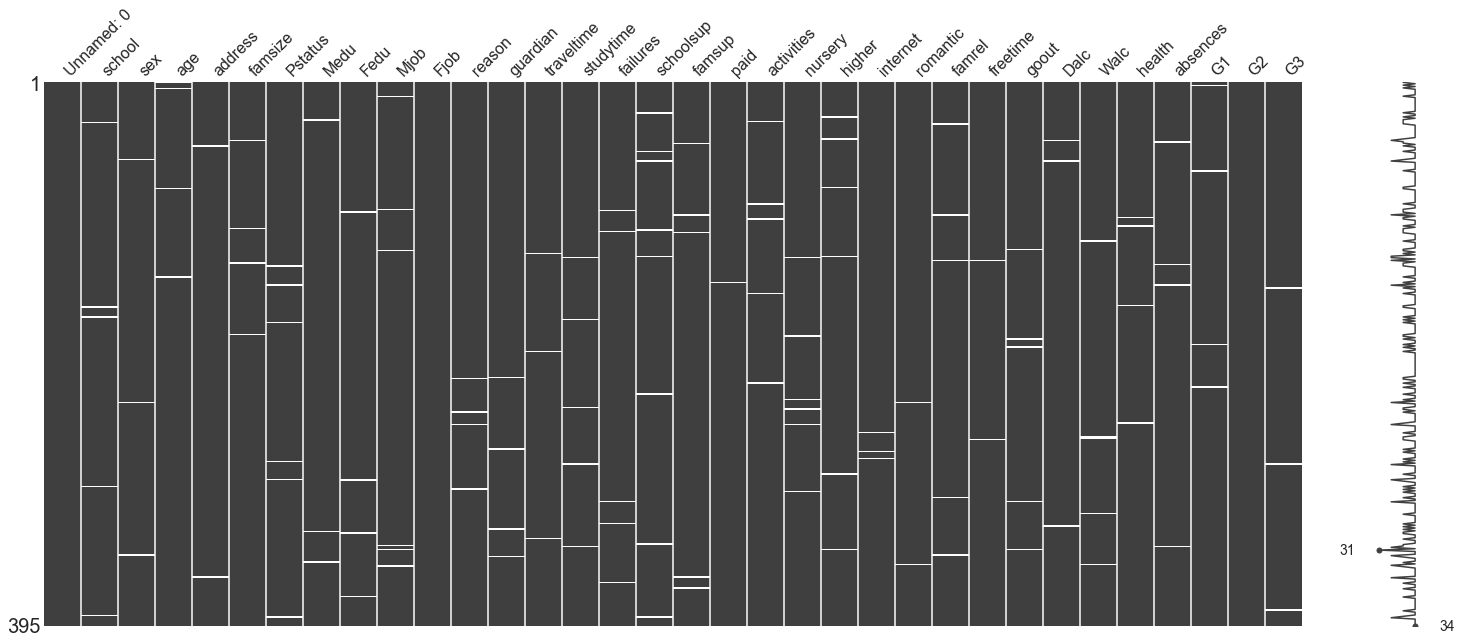

In [12]:
msno.matrix(df2)

In [13]:
cant_nan(df2)

,Variable,Cantidad de NaN
0,Unnamed: 0,0
1,school,5
2,sex,3
3,age,4
4,address,2
5,famsize,4
6,Pstatus,6
7,Medu,3
8,Fedu,5
9,Mjob,6


In [14]:
df2.sample()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
203,203,GP,F,"""17""",R,GT3,T,2,2,other,...,5,3,"""2""",1,2,"""3""",18,7,6,6


#### 4) Detección de ?, reemplazo a NaN y obtención del Dataframe de trabajo

In [15]:
df2['age_conv'] = conversor_num(df2, 'age')
df2['goout_conv'] = conversor_num(df2, 'goout')
df2['health_conv'] = conversor_num(df2, 'health')
df2['G1_conv'] = conversor_int(df2, 'G1')
df2['G3_conv'] = conversor_int(df2, 'G3')

In [16]:
df2.dtypes

Unnamed: 0       int64
school          object
sex             object
age             object
address         object
famsize         object
Pstatus         object
Medu            object
Fedu            object
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime      object
studytime       object
failures        object
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel          object
freetime        object
goout           object
Dalc            object
Walc            object
health          object
absences        object
G1              object
G2               int64
G3              object
age_conv       float64
goout_conv     float64
health_conv    float64
G1_conv        float64
G3_conv        float64
dtype: object

In [17]:
df_final = df2.loc[:,['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',  'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'Dalc', 'Walc', 'absences', 'age_conv', 'goout_conv', 'health_conv', 'G1_conv', 'G2', 'G3_conv']]

In [18]:
df_final.sample()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,Dalc,Walc,absences,age_conv,goout_conv,health_conv,G1_conv,G2,G3_conv
29,NaN,M,U,GT3,T,4,4,teacher,teacher,home,...,4,5,5,16,16.0,5.0,5.0,10.0,12,11.0


# Hito 2

Completar el punto de Preliminares, así como Aspectos computacionales.

Completar el punto de Descripción.
* Elementos a considerar en éste hito:
* La inspección visual del vector objetivo. (2 puntos)
* La inspección visual de las variables. (2 puntos)
* La inspección de datos perdidos en las variables. (1 punto)
* De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables.

Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados e interpretados. De ser necesario, un archivo con extensión .py con todas las funciones implementadas.

#### Inspección visual del vector 'G3'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


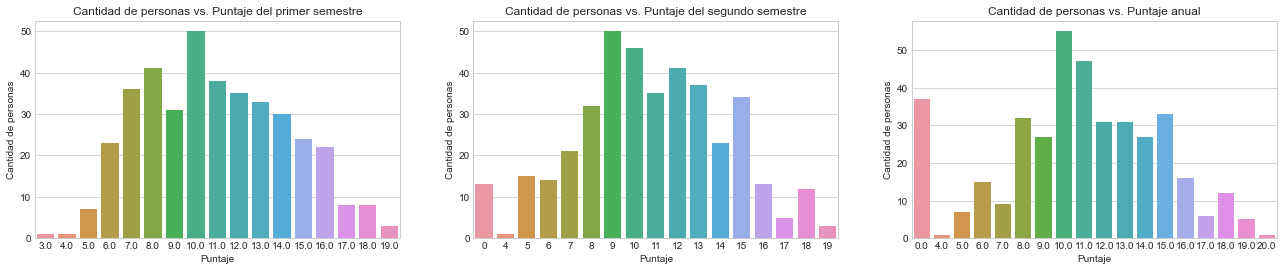

In [19]:
vector = ['G1_conv', 'G2', 'G3_conv']
notas(df_final, vector)

#### Interpretación
De las 395 estudiantes muestreados, el 26% aprox. obtiene puntajes entre 10 y 11 puntos (valores más frecuentes en la muestra). Así mismo, el 67% de los estudiantes posee puntajes mayores o iguales a 10.

### Inspección visual de las variables
Para la inspección visual, se aplicó una función (estadisticos_continuos), la cual entrega los datos de media, moda y desviación estándar de aquellas variables de tipo contínuo (para más información, chequear aspectos computacionales de la función)

In [20]:
estadisticos_continuos(df_final)

,Media,Mediana,Desviación Estándar
age_conv,16.698210,17.0,1.279412
goout_conv,3.102564,3.0,1.117629
health_conv,3.570332,4.0,1.377303
G1_conv,10.933504,11.0,3.320593
G2,10.713924,11.0,3.761505
G3_conv,10.446429,11.0,4.568007


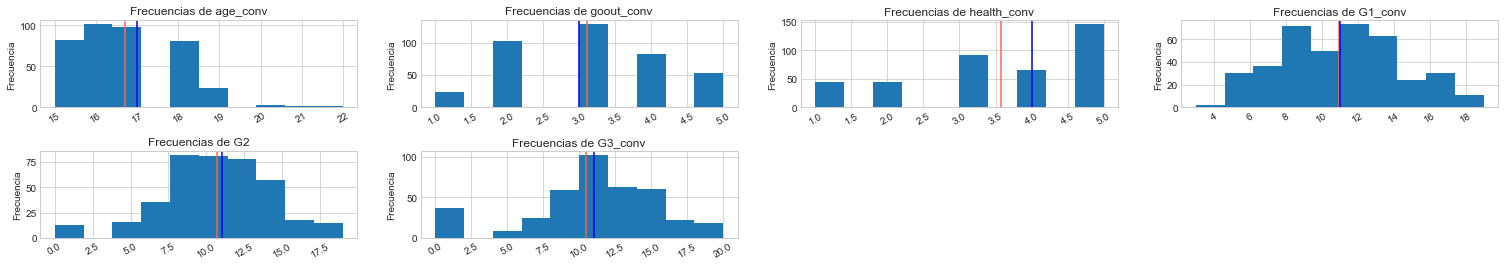

In [21]:
grafestad_continuos(df_final)

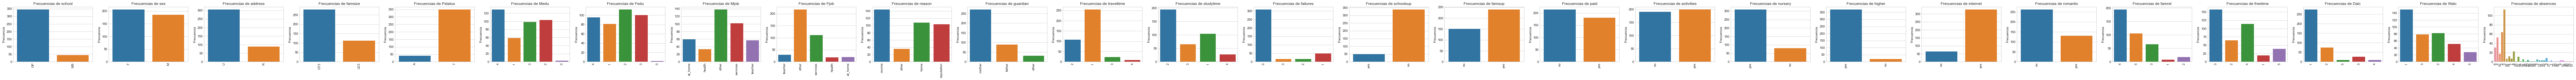

In [22]:
plt.figure(figsize=(10,40))
grafestad_discretos(df_final, 11, 5)

#### Interpretación:
* La muestra está compuesta por hombres y mujeres de 17 años, adolescentes, los que mayoritariamente presentan un buen estado de salud.
* Principalmente, los estudiantes asisten al colegio Gabriel Pereira, el cual es escogido preferentemente por los cursos que posee y por la cercanía a los hogares, pudiendo llegar en menos de 15 min. Sus apoderados son principalmente sus madres.
* Viven principalmente en la zona urbana con sus familias, de aprox. 3 personas y compuestas por ambos padres. Las relaciones al interior del núcleo familiar tienden a ser buenas.
* En general, las madres tienden a cursar estudios superiores, las cuales se dedican laboralmente a ocupaciones diferentes a la enseñanza, servicios, salud o domiciliaria; mientras que los padres llegan hasta educación básica o media, desempeñándose en los mismos rubros que las madres.
* Los estudiantes dedican cerca de 2 a 5 horas de estudio, lo cual se condice con un bajo nivel de reprobación académica y bajo apoyo académico de la institución y sus padres.
* Los adolescentes tienden a realizar activiidades fuera del colegio, saliendo 3 veces por semana con sus amigos y tienden a consumir bajar cantidades de alcohol durante la semana. Solo algunos se encuentran en una relación romántica. Algunos dedican su tiempo a actividades pagadas y curriculares.
* En los educacional, la mayor parte de los jóvenes asistió a una guardería infantil y tiene entre sus planes continuar con estudios superiores.
* La mayor parte de ellos tiene acceso a internet.
* El ausentismo escolar es muy bajo, con promedios de notas en los primeros semestres de 11 puntos. Estos puntajes tienden a bajar en los segundos semestres, los cuales son muy parecidos a sus calificaciones finales de año escolar.

#### Binarización previa

In [23]:
df_final['school_bin'] = binarizador(df_final, 'school', 'GP', 0)
df_final['sex_bin'] = binarizador(df_final, 'sex', 'F', 0)
df_final['address_bin'] = binarizador(df_final, 'address', 'U', 0)
df_final['famsize_bin'] = binarizador(df_final, 'famsize', 'GT3', 0)
df_final['Pstatus_bin'] = binarizador(df_final, 'Pstatus', 'T', 0)
df_final['Medu_bin'] = binarizador(df_final, 'Medu', '4', 0)
df_final['Fedu_bin'] = binarizador(df_final, 'Fedu', '0', 1)
df_final['Mjob_bin'] = binarizador(df_final, 'Mjob', 'other', 0)
df_final['Fjob_bin'] = binarizador(df_final, 'Fjob', 'other', 0)
df_final['reason_bin'] = binarizador(df_final, 'reason', 'course', 0)
df_final['guardian_bin'] = binarizador(df_final, 'guardian', 'mother', 0)
df_final['traveltime_bin'] = binarizador(df_final, 'traveltime', '1', 0)
df_final['studytime_bin'] = binarizador(df_final, 'studytime', '2', 0)
df_final['failures_bin'] = binarizador(df_final, 'failures', '0', 0)
df_final['schoolsup_bin'] = binarizador(df_final, 'schoolsup', 'no', 0)
df_final['famsup_bin'] = binarizador(df_final, 'famsup', 'yes', 0)
df_final['paid_bin'] = binarizador(df_final, 'paid', 'no', 0)
df_final['activities_bin'] = binarizador(df_final, 'activities', 'yes', 0)
df_final['nursery_bin'] = binarizador(df_final, 'nursery', 'yes', 0)
df_final['higher_bin'] = binarizador(df_final, 'higher', 'yes', 0)
df_final['internet_bin'] = binarizador(df_final, 'internet', 'yes', 0)
df_final['romantic_bin'] = binarizador(df_final, 'romantic', 'no', 0)
df_final['famrel_bin'] = binarizador(df_final, 'famrel', '4', 0)
df_final['freetime_bin'] = binarizador(df_final, 'freetime', '3', 0)
df_final['Dalc_bin'] = binarizador(df_final, 'Dalc', '1', 0)
df_final['Walc_bin'] = binarizador(df_final, 'Walc', '1', 0)
df_final['absences_bin'] = binarizador(df_final, 'absences', '0', 0)
df_final['G1_bin'] = binarizador(df_final, 'G1_conv', df_final['G1_conv'].mean(), 0, 'mayorig')
df_final['G2_bin'] = binarizador(df_final, 'G2', df_final['G2'].mean(), 0, 'mayorig')
df_final['G3_bin'] = binarizador(df_final, 'G3_conv', df_final['G3_conv'].mean(), 0, 'mayorig')
df_final['goout_bin'] = binarizador(df_final, 'goout_conv', df_final['goout_conv'].mean(), 0, 'mayorig')
df_final['age_bin'] = binarizador(df_final, 'age_conv', df_final['age_conv'].mean(), 0, 'mayorig')
df_final['health_bin'] = binarizador(df_final, 'health_conv', df_final['health_conv'].mean(), 0, 'mayorig')

# Hito 3

Completar el punto de Modelación descriptiva.
Elementos a considerar en éste hito:
* La modelación mediante regresión de ambos problemas. (2 puntos)
* La interpretación de los principales regresores en cada problema. (2 puntos)
* La definición de las estrategias de Modelación predictiva. (1 punto)

### Modelación

#### Nota introductoria:
Caracterizada la muestra, se procedió al modelamiento utilizando todos los atributos presentes. Para un correcto análisis, las notas de primer semestre (G1), segundo semestre(G2) y final (G3) fueron analizadas de manera independiente y relacionando los factores no académicos y ambientales.

In [24]:
df_trabajo = df_final.loc[:,['school_bin', 'sex_bin', 'address_bin', 'famsize_bin', 'Pstatus_bin', 'Medu_bin', 'Fedu_bin', 'Mjob_bin', 'Fjob_bin', 'reason_bin', 'guardian_bin',  'traveltime_bin', 'studytime_bin', 'failures_bin', 'schoolsup_bin', 'famsup_bin', 'paid_bin', 'activities_bin', 'nursery_bin', 'higher_bin', 'internet_bin', 'romantic_bin', 'famrel_bin', 'freetime_bin', 'Dalc_bin', 'Walc_bin', 'absences_bin', 'age_bin', 'goout_bin', 'health_bin', 'G1_bin', 'G2_bin', 'G3_bin']]

In [25]:
m1_logit_G3 = smf.logit('G3_bin ~ school_bin + sex_bin + address_bin + famsize_bin + Pstatus_bin + Medu_bin + Fedu_bin + Mjob_bin + Fjob_bin + reason_bin + guardian_bin + traveltime_bin + studytime_bin + failures_bin + schoolsup_bin + famsup_bin + paid_bin + activities_bin + nursery_bin + higher_bin + internet_bin + romantic_bin + famrel_bin + freetime_bin + Dalc_bin + Walc_bin + absences_bin + age_bin + goout_bin + health_bin', df_trabajo).fit()
m1_logit_G3.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.585954
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.8857,0.592,1.495,0.135,-0.275,2.047
school_bin,0.1695,0.391,0.433,0.665,-0.597,0.936
sex_bin,-0.2993,0.248,-1.204,0.228,-0.786,0.188
address_bin,0.0738,0.306,0.241,0.810,-0.527,0.674
famsize_bin,-0.1559,0.263,-0.592,0.554,-0.672,0.360
Pstatus_bin,-0.4769,0.375,-1.272,0.203,-1.212,0.258
Medu_bin,0.2904,0.268,1.084,0.278,-0.234,0.815
Fedu_bin,0.5030,1.502,0.335,0.738,-2.442,3.448
Mjob_bin,0.0389,0.263,0.148,0.883,-0.477,0.555
Fjob_bin,-0.3248,0.252,-1.287,0.198,-0.819,0.170


In [26]:
m1_logit_G2 = smf.logit('G2_bin ~ school_bin + sex_bin + address_bin + famsize_bin + Pstatus_bin + Medu_bin + Fedu_bin + Mjob_bin + Fjob_bin + reason_bin + guardian_bin + traveltime_bin + studytime_bin + failures_bin + schoolsup_bin + famsup_bin + paid_bin + activities_bin + nursery_bin + higher_bin + internet_bin + romantic_bin + famrel_bin + freetime_bin + Dalc_bin + Walc_bin + absences_bin + age_bin + goout_bin + health_bin', df_trabajo).fit()
m1_logit_G2.summary().tables[1]

         Current function value: 0.566083
         Iterations: 35


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.9624,0.602,1.600,0.110,-0.217,2.142
school_bin,-0.2141,0.397,-0.540,0.589,-0.991,0.563
sex_bin,-0.3975,0.252,-1.577,0.115,-0.892,0.097
address_bin,0.1268,0.312,0.406,0.685,-0.485,0.739
famsize_bin,-0.3267,0.269,-1.216,0.224,-0.853,0.200
Pstatus_bin,-0.5464,0.382,-1.430,0.153,-1.295,0.202
Medu_bin,0.3504,0.272,1.290,0.197,-0.182,0.883
Fedu_bin,-31.1187,4e+06,-7.78e-06,1.000,-7.84e+06,7.84e+06
Mjob_bin,-0.0720,0.268,-0.269,0.788,-0.597,0.453
Fjob_bin,-0.5516,0.257,-2.143,0.032,-1.056,-0.047


In [27]:
m1_logit_G1 = smf.logit('G1_bin ~ school_bin + sex_bin + address_bin + famsize_bin + Pstatus_bin + Medu_bin + Fedu_bin + Mjob_bin + Fjob_bin + reason_bin + guardian_bin + traveltime_bin + studytime_bin + failures_bin + schoolsup_bin + famsup_bin + paid_bin + activities_bin + nursery_bin + higher_bin + internet_bin + romantic_bin + famrel_bin + freetime_bin + Dalc_bin + Walc_bin + absences_bin + age_bin + goout_bin + health_bin', df_trabajo).fit()
m1_logit_G1.summary().tables[1]

         Current function value: 0.577052
         Iterations: 35


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.4182,0.603,2.351,0.019,0.236,2.600
school_bin,0.0360,0.396,0.091,0.928,-0.740,0.812
sex_bin,-0.5191,0.250,-2.076,0.038,-1.009,-0.029
address_bin,0.1717,0.308,0.557,0.578,-0.433,0.776
famsize_bin,-0.2402,0.264,-0.910,0.363,-0.757,0.277
Pstatus_bin,-0.3333,0.378,-0.882,0.378,-1.074,0.408
Medu_bin,0.1713,0.269,0.636,0.525,-0.357,0.699
Fedu_bin,-32.1287,6.46e+06,-4.98e-06,1.000,-1.27e+07,1.27e+07
Mjob_bin,-0.5964,0.268,-2.223,0.026,-1.122,-0.071
Fjob_bin,-0.3285,0.253,-1.300,0.194,-0.824,0.167


### Interpretación:
De un total de 30 atributos analizados:
* **G3:** Solo 5 de ellos fueron considerados como significativos (p < 0.05), las que guardan relación con el nivel de reprobación de asignaturas (failures_bin), apoyo educacional del colegio (schoolsup_bin), la cantidad de tiempo libre fuera del colegio (freetime_bin), el nivel de inasistencias (absences_bin) y la cantidad de salidas con amigos (goout_bin). Cada una de estas corresponden a datos sociodemográficos y conductuales.

* **G2:** 6 de ellos fueron considerados como significativos (p < 0.05), las que guardan relación con el trabajo del padre (Fjob_bin), el nivel de reprobación de asignaturas (failures_bin), apoyo educacional del colegio (schoolsup_bin), la cantidad de tiempo libre fuera del colegio (freetime_bin), el interés con proseguir estudios superiores (higher_bin) y la cantidad de salidas con amigos (goout_bin). Al igual que en el caso anterior, cada una de estas corresponden a datos sociodemográficos y conductuales.

* **G1:** 9 de ellos fueron considerados como significativos (p < 0.05), las que guardan relación con el sexo del estudiante (sex_bin), trabajo de la madre (Mjob_bin), las razones para escoger la escuela (reason_bin), el nivel de reprobación de asignaturas (failures_bin), apoyo educacional del colegio (schoolsup_bin), la cantidad de tiempo libre fuera del colegio (freetime_bin), el interés con proseguir estudios superiores (higher_bin), la relación con los padres (famrel_bin) y la cantidad de salidas con amigos (goout_bin). Si bien existen datos sociodemográficos y conductuales, aparecen por primera vez un aspecto ambiental.

La mayor cantidad de atributos durante el primer semestre, puede guardar relación con la influencia y perspectivas del inicio de semestre: la influencia del trabajo de la madre (su nivel de participación), el rol que esta cumple como apoderado, la relación parental y las razones por las que se escogió el colegio como proyección del inicio de semestre, parecen influir en que los puntajes semestrales sean mayores. Sin embargo, dicha influencia tiende a perderse con el tiempo, viéndose afectado por el rol del padre en el proceso educativo y las aspiraciones a cursar estudios superiores durante el segundo semestre. Es importante recalcar que, pese a lo anterior, **hay 4 atributos que se mantienen constantes en todos los semestres: el nivel de reprobación de asignaturas (failures_bin), apoyo educacional del colegio (schoolsup_bin), la cantidad de tiempo libre fuera del colegio (freetime_bin) y la la cantidad de salidas con amigos (goout_bin)**. Solo en el final del año, el ausentismo escolar tendría alguna influencia.

Considerando lo anterior, se procedió a refactorizar los modelos.

In [28]:
m1_logit_G3_refac = smf.logit('G3_bin ~ failures_bin + schoolsup_bin + freetime_bin + absences_bin + goout_bin', df_trabajo).fit()
m1_logit_G3_refac.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.623713
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.5578,0.303,1.842,0.065,-0.036,1.151
failures_bin,1.4775,0.280,5.272,0.000,0.928,2.027
schoolsup_bin,0.6136,0.306,2.008,0.045,0.015,1.212
freetime_bin,-0.5627,0.227,-2.481,0.013,-1.007,-0.118
absences_bin,-0.3984,0.242,-1.648,0.099,-0.872,0.075
goout_bin,-0.6967,0.232,-3.003,0.003,-1.151,-0.242


In [29]:
m1_logit_G2_refac = smf.logit('G2_bin ~ Fjob_bin + failures_bin + schoolsup_bin + freetime_bin + higher_bin + goout_bin', df_trabajo).fit()
m1_logit_G2_refac.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.601794
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.5648,0.274,2.063,0.039,0.028,1.101
Fjob_bin,-0.5643,0.227,-2.486,0.013,-1.009,-0.119
failures_bin,1.5199,0.295,5.155,0.000,0.942,2.098
schoolsup_bin,1.0445,0.323,3.230,0.001,0.411,1.678
freetime_bin,-0.7524,0.232,-3.243,0.001,-1.207,-0.298
higher_bin,1.0623,0.516,2.060,0.039,0.051,2.073
goout_bin,-0.6848,0.238,-2.878,0.004,-1.151,-0.218


In [30]:
m1_logit_G1_refac = smf.logit('G1_bin ~ sex_bin + Mjob_bin + reason_bin + failures_bin + schoolsup_bin + higher_bin + famrel_bin + freetime_bin + goout_bin', df_trabajo).fit()
m1_logit_G1_refac.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.603617
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,1.2000,0.380,3.160,0.002,0.456,1.944
sex_bin,-0.4765,0.224,-2.123,0.034,-0.916,-0.037
Mjob_bin,-0.5701,0.235,-2.430,0.015,-1.030,-0.110
reason_bin,-0.4506,0.231,-1.949,0.051,-0.904,0.003
failures_bin,1.2200,0.286,4.267,0.000,0.660,1.780
schoolsup_bin,0.7779,0.319,2.442,0.015,0.154,1.402
higher_bin,1.1656,0.519,2.244,0.025,0.148,2.184
famrel_bin,0.3643,0.223,1.632,0.103,-0.073,0.802
freetime_bin,-0.7546,0.234,-3.225,0.001,-1.213,-0.296
goout_bin,-0.7936,0.241,-3.289,0.001,-1.267,-0.321


In [31]:
att_refac_G3 = ['failures_bin', 'schoolsup_bin', 'freetime_bin', 'absences_bin', 'goout_bin']
att_refac_G2 = ['Fjob_bin', 'failures_bin', 'schoolsup_bin', 'freetime_bin', 'higher_bin', 'goout_bin']
att_refac_G1 = ['sex_bin', 'Mjob_bin', 'reason_bin', 'failures_bin', 'schoolsup_bin', 'higher_bin', 'famrel_bin' ,'freetime_bin', 'goout_bin']

In [32]:
estimador_binario(m1_logit_G3_refac, att_refac_G3)

,Atributo,Estimación 0,Estimación 1
0,failures_bin,0.635937,0.884446
1,schoolsup_bin,0.635937,0.763387
2,freetime_bin,0.635937,0.498771
3,absences_bin,0.635937,0.539752
4,goout_bin,0.635937,0.465317


In [33]:
estimador_binario(m1_logit_G2_refac, att_refac_G2)

,Atributo,Estimación 0,Estimación 1
0,Fjob_bin,0.637556,0.500107
1,failures_bin,0.637556,0.889400
2,schoolsup_bin,0.637556,0.833309
3,freetime_bin,0.637556,0.453221
4,higher_bin,0.637556,0.835775
5,goout_bin,0.637556,0.470020


In [34]:
estimador_binario(m1_logit_G1_refac, att_refac_G1)

,Atributo,Estimación 0,Estimación 1
0,sex_bin,0.768525,0.673371
1,Mjob_bin,0.768525,0.652472
2,reason_bin,0.768525,0.679059
3,failures_bin,0.768525,0.918337
4,schoolsup_bin,0.768525,0.878456
5,higher_bin,0.768525,0.914170
6,famrel_bin,0.768525,0.826975
7,freetime_bin,0.768525,0.609555
8,goout_bin,0.768525,0.600222


### Interpretación:
Para cada una de las tablas generadas, estimación 0 hace referencia a la probabilidad de aprobación, mientras que estimación 1 se enfoca en la reprobación.

Las refactorizaciones de los atributos significativos, explicaron de manera diferencial cada vector objetivo como sigue:

* **G1:** Los factores son capaces de predecir una aprobación del primer semestre en un 77% de los casos. De todos ellos, la relación con los padres durante el primer semestre, así como el apoyo escolar inicial, antecedentes de reprobaciones previas y las aspiraciones a la educación superior permiten predecir la probabilidad de reprobación sobre el 83% de los casos (llegando a valores sobre el 91% en el caso de las reprobaciones previas y las aspiraciones). Se cree que el factor ambiental con los antecedentes del estudiante son claves para una aprobación exitosa.

* **G2:** Los factores identificados explican la aprobación en un 64% de los casos. En cuanto a las reprobaciones, los factores más incidentes son la presencia de apoyo educativo, los antecedentes de reprobación y las aspiraciones, los que explican entre el 83% al 89% de los casos. En este caso, solo factores sociodemográficos son requeridos para dicha predicción.

* **G3:** Los factores explican la aprobación en un 64% de los casos. Por su parte, solo los antecedentes de reprobación y el apoyo escolar permiten explicar las reprobaciones entre un 76% y un 88% de los casos. Es importante destacar que es el nivel de intervención de las escuelas y el proceso académico de los estudiantes los más relevantes a la hora de evaluar su reprobación.

# Hito 4

Completar el punto de Modelación predictiva.
Elementos a considerar en éste hito:
* La preparación del ambiente de trabajo (imports, separación de muestras) para
* implementar modelos de predicción. (1 punto)
* La implementación de por lo menos tres modelos predictivos. (2 puntos)
* El reporte del mejor modelo predictivo en base a los resultados. (2 puntos)

In [35]:
atributos = []
for d in df_trabajo:
    if (d != 'G1_bin') and (d != 'G2_bin') and (d != 'G3_bin'):
        atributos.append(d)

### G3

#### * Todos los atributos

In [36]:
X_mat_G3 = df_trabajo.loc[:, atributos]
X_train_G3, X_test_G3, y_train_G3, y_test_G3 = train_test_split(X_mat_G3, df_trabajo['G3_bin'], test_size = .33, random_state = 20000)

In [37]:
X_train_std_G3 = StandardScaler().fit_transform(X_train_G3)
X_test_std_G3 = StandardScaler().fit_transform(X_test_G3)
default_model_G3 = LogisticRegression().fit(X_train_std_G3, y_train_G3)

In [38]:
default_model_G3.coef_
default_model_G3.intercept_
yhat_G3 = default_model_G3.predict(X_test_std_G3)
yhat_pr_G3 = default_model_G3.predict_proba(X_test_std_G3)

#### * Atributos refactorizados

In [39]:
X_mat_G3_refac = df_trabajo.loc[:, ['failures_bin', 'schoolsup_bin', 'freetime_bin', 'absences_bin', 'goout_bin']]
X_train_G3_refac, X_test_G3_refac, y_train_G3_refac, y_test_G3_refac = train_test_split(X_mat_G3_refac, df_trabajo['G3_bin'], test_size = .33, random_state = 20000)

In [40]:
X_train_std_G3_refac = StandardScaler().fit_transform(X_train_G3_refac)
X_test_std_G3_refac = StandardScaler().fit_transform(X_test_G3_refac)
default_model_G3_refac = LogisticRegression().fit(X_train_std_G3_refac, y_train_G3_refac)

In [41]:
default_model_G3_refac.coef_
default_model_G3_refac.intercept_
yhat_G3_refac = default_model_G3_refac.predict(X_test_std_G3_refac)
yhat_pr_G3_refac = default_model_G3_refac.predict_proba(X_test_std_G3_refac)

* Exactitud, Precisión, Recall y F1

In [42]:
m1_acc = [accuracy_score(y_test_G3, yhat_G3), accuracy_score(y_test_G3_refac, yhat_G3_refac)]
m1_prec = [precision_score(y_test_G3, yhat_G3), precision_score(y_test_G3_refac, yhat_G3_refac)]
m1_recall = [recall_score(y_test_G3, yhat_G3), recall_score(y_test_G3_refac, yhat_G3_refac)]
m1_fscore = [f1_score(y_test_G3, yhat_G3), f1_score(y_test_G3_refac, yhat_G3_refac)]
pd.DataFrame({'Exactitud': m1_acc,
              'Precisión': m1_prec,
              'Recall': m1_recall,
              'F1': m1_fscore}, index=['Todos los atributos', 'Refactorizados'])

,Exactitud,Precisión,Recall,F1
Todos los atributos,0.679389,0.660714,0.616667,0.637931
Refactorizados,0.648855,0.652174,0.500000,0.566038


### G2

#### * Todos los atributos

In [43]:
X_mat_G2 = df_trabajo.loc[:, atributos]
X_train_G2, X_test_G2, y_train_G2, y_test_G2 = train_test_split(X_mat_G2, df_trabajo['G2_bin'], test_size = .33, random_state = 20000)

In [44]:
X_train_std_G2 = StandardScaler().fit_transform(X_train_G2)
X_test_std_G2 = StandardScaler().fit_transform(X_test_G2)
default_model_G2 = LogisticRegression().fit(X_train_std_G2, y_train_G2)

In [45]:
default_model_G2.coef_
default_model_G2.intercept_
yhat_G2 = default_model_G2.predict(X_test_std_G2)
yhat_pr_G2 = default_model_G2.predict_proba(X_test_std_G2)

#### * Atributos refactorizados

In [46]:
X_mat_G2_refac = df_trabajo.loc[:, ['Fjob_bin', 'failures_bin', 'schoolsup_bin', 'freetime_bin', 'higher_bin', 'goout_bin']]
X_train_G2_refac, X_test_G2_refac, y_train_G2_refac, y_test_G2_refac = train_test_split(X_mat_G2_refac, df_trabajo['G2_bin'], test_size = .33, random_state = 20000)

In [47]:
X_train_std_G2_refac = StandardScaler().fit_transform(X_train_G2_refac)
X_test_std_G2_refac = StandardScaler().fit_transform(X_test_G2_refac)
default_model_G2_refac = LogisticRegression().fit(X_train_std_G2_refac, y_train_G2_refac)

In [48]:
default_model_G2_refac.coef_
default_model_G2_refac.intercept_
yhat_G2_refac = default_model_G2_refac.predict(X_test_std_G2_refac)
yhat_pr_G2_refac = default_model_G2_refac.predict_proba(X_test_std_G2_refac)

* Exactitud, Precisión, Recall y F1

In [49]:
m1_acc = [accuracy_score(y_test_G2, yhat_G2), accuracy_score(y_test_G2_refac, yhat_G2_refac)]
m1_prec = [precision_score(y_test_G2, yhat_G2), precision_score(y_test_G2_refac, yhat_G2_refac)]
m1_recall = [recall_score(y_test_G2, yhat_G2), recall_score(y_test_G2_refac, yhat_G2_refac)]
m1_fscore = [f1_score(y_test_G2, yhat_G2), f1_score(y_test_G2_refac, yhat_G2_refac)]
pd.DataFrame({'Exactitud': m1_acc,
              'Precisión': m1_prec,
              'Recall': m1_recall,
              'F1': m1_fscore}, index=['Todos los atributos', 'Refactorizados'])

,Exactitud,Precisión,Recall,F1
Todos los atributos,0.671756,0.684211,0.609375,0.644628
Refactorizados,0.633588,0.690476,0.453125,0.547170


### G1

#### * Todos los atributos

In [50]:
X_mat_G1 = df_trabajo.loc[:, atributos]
X_train_G1, X_test_G1, y_train_G1, y_test_G1 = train_test_split(X_mat_G1, df_trabajo['G1_bin'], test_size = .33, random_state = 20000)

In [51]:
X_train_std_G1 = StandardScaler().fit_transform(X_train_G1)
X_test_std_G1 = StandardScaler().fit_transform(X_test_G1)
default_model_G1 = LogisticRegression().fit(X_train_std_G1, y_train_G1)

In [52]:
default_model_G1.coef_
default_model_G1.intercept_
yhat_G1 = default_model_G1.predict(X_test_std_G1)
yhat_pr_G1 = default_model_G1.predict_proba(X_test_std_G1)

#### * Atributos refactorizados

In [53]:
X_mat_G1_refac = df_trabajo.loc[:, ['sex_bin', 'Mjob_bin', 'reason_bin', 'failures_bin', 'schoolsup_bin', 'higher_bin', 'famrel_bin' ,'freetime_bin', 'goout_bin']]
X_train_G1_refac, X_test_G1_refac, y_train_G1_refac, y_test_G1_refac = train_test_split(X_mat_G1_refac, df_trabajo['G1_bin'], test_size = .33, random_state = 20000)

In [54]:
X_train_std_G1_refac = StandardScaler().fit_transform(X_train_G1_refac)
X_test_std_G1_refac = StandardScaler().fit_transform(X_test_G1_refac)
default_model_G1_refac = LogisticRegression().fit(X_train_std_G1_refac, y_train_G1_refac)

In [55]:
default_model_G1_refac.coef_
default_model_G1_refac.intercept_
yhat_G1_refac = default_model_G1_refac.predict(X_test_std_G1_refac)
yhat_pr_G1_refac = default_model_G1_refac.predict_proba(X_test_std_G1_refac)

* Exactitud, Precisión, Recall y F1

In [56]:
m1_acc = [accuracy_score(y_test_G1, yhat_G1), accuracy_score(y_test_G1_refac, yhat_G1_refac)]
m1_prec = [precision_score(y_test_G1, yhat_G1), precision_score(y_test_G1_refac, yhat_G1_refac)]
m1_recall = [recall_score(y_test_G1, yhat_G1), recall_score(y_test_G1_refac, yhat_G1_refac)]
m1_fscore = [f1_score(y_test_G1, yhat_G1), f1_score(y_test_G1_refac, yhat_G1_refac)]
pd.DataFrame({'Exactitud': m1_acc,
              'Precisión': m1_prec,
              'Recall': m1_recall,
              'F1': m1_fscore}, index=['Todos los atributos', 'Refactorizados'])

,Exactitud,Precisión,Recall,F1
Todos los atributos,0.625954,0.673077,0.522388,0.588235
Refactorizados,0.664122,0.744681,0.522388,0.614035


### Interpretación:
Interesantemente, la aproximación desde Machine Learning genera tres modelos cuyos parámetros se analizan a continuación:

* **Exactitud y Precision:** Tanto para G1, G2 y G3, las precisiones son superiores al 63%. En cuanto a precisión, estas son superiores al 65%. Existen diferencias entre el uso de todas las variables versus el uso de la forma refactorizada de los atributos: en el caso de G1, la refactorización genera una mayor precisión y exactitud de encontrar a los alumnos con probabilidades de aprobar y reprobar. Si bien, en G2 y G3 es la combinación de todos los atributos la que ofrece los mayores niveles de precisión y exactitud, no son significativos respecto a los valores factorizados.

* **Recall y F1:** Los valores de Recall y F1 en todas las condiciones son bajos, llegando a ser inferiores al 50% en algunos casos. Sin embargo es importante destacar el contexto del desarrollo de este modelo: determinar factores predictores de la reprobación. En este sentido, en caso que el modelo llegase a detectar "Falsos reprobados", el modelo igualmente adquiere una validez desde el resguardo educativo: las instituciones deben hacer todo lo posible para asegurar el aprendizaje de sus estudiantes. Aún cuando se catalogue a un "Falso reprobado", la aplicación de apoyo escolar transitorio haría que aquellos que sí aprobarían lo hagan igualmente.


### Conclusión:
Se concluye que los factores descritos para G1, G2 y G3 **permiten generar un modelo inicial para tener una primera aproximación de la realidad de los estudiantes, utilizando mayoritariamente factores como los antecedentes de reprobación y la motivación de seguir estudios superiores**. Para aumentar los valores de Recall y F1, se sugiere aumentar el tamaño muestral, encuestando más estudiantes de otras instituciones, a modo de mejorar dichos valores. Así mismo, métodos dimensionales de aprendizaje no supervisado, como K-Means, podrían aportar en la formación de grupos de trabajo y de enfoque escolar, estableciéndose quienes son los grupos prioritarios.